In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DIR="/mnt/c/Users/Srujan/Documents/Datasets/Housing Price/"
train=pd.read_csv(DIR+"train.csv")
test=pd.read_csv(DIR+"test.csv")
pd.pandas.set_option("display.max_columns",None)
train.shape
test.shape
#test dataset doesnt contain SalePrice column

(1459, 80)

In [3]:
train.isnull().any().sum()

19

In [4]:
train.isnull().any().sum()
features_nan=[features for features in train.columns if train[features].isnull().sum()>0]
features_nan_test=[features for features in test.columns if test[features].isnull().sum()>0]
print(features_nan)
for features in features_nan:
    print(features+" "+str(np.round(train[features].isnull().mean(),4))+"% of nan values")
print("\n\n")
for features in features_nan_test:
    print(features+" "+str(np.round(test[features].isnull().mean(),4))+"% of nan values")

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
LotFrontage 0.1774% of nan values
Alley 0.9377% of nan values
MasVnrType 0.0055% of nan values
MasVnrArea 0.0055% of nan values
BsmtQual 0.0253% of nan values
BsmtCond 0.0253% of nan values
BsmtExposure 0.026% of nan values
BsmtFinType1 0.0253% of nan values
BsmtFinType2 0.026% of nan values
Electrical 0.0007% of nan values
FireplaceQu 0.4726% of nan values
GarageType 0.0555% of nan values
GarageYrBlt 0.0555% of nan values
GarageFinish 0.0555% of nan values
GarageQual 0.0555% of nan values
GarageCond 0.0555% of nan values
PoolQC 0.9952% of nan values
Fence 0.8075% of nan values
MiscFeature 0.963% of nan values



MSZoning 0.0027% of nan values
LotFrontage 0.1556% of nan values
Alley 0.9267% of nan values
Utilities 0.0014% of nan 

## EDA

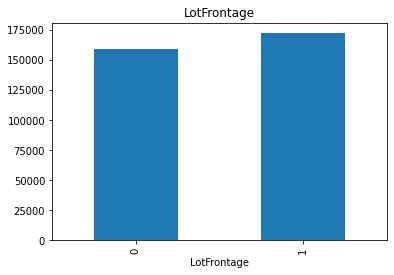

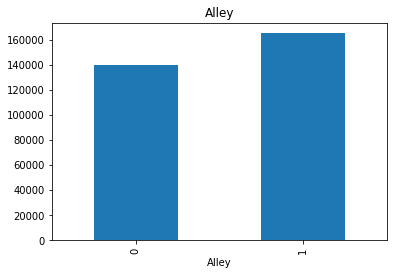

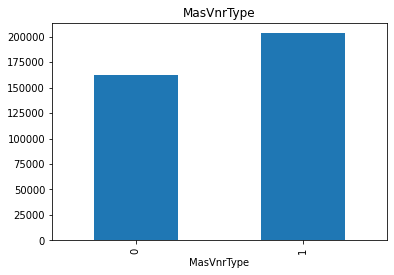

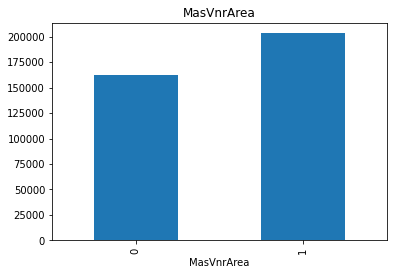

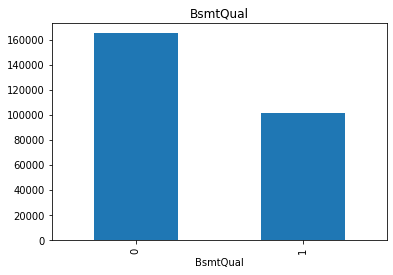

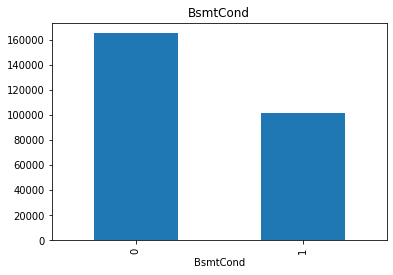

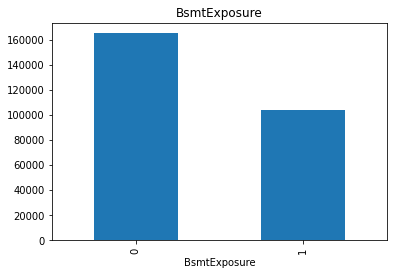

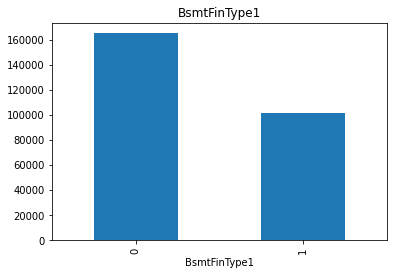

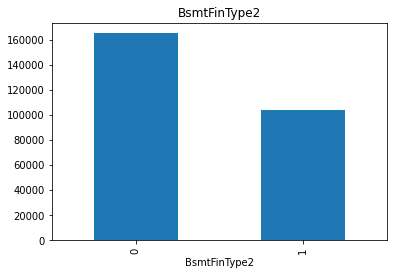

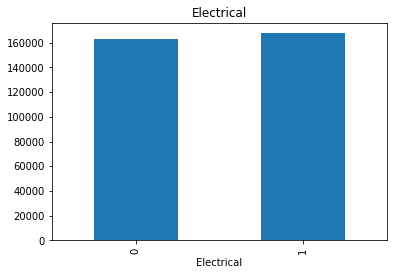

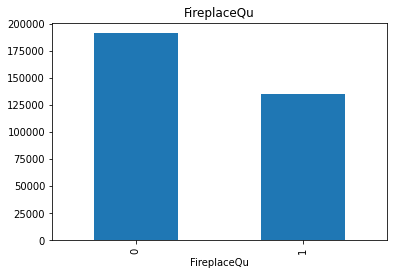

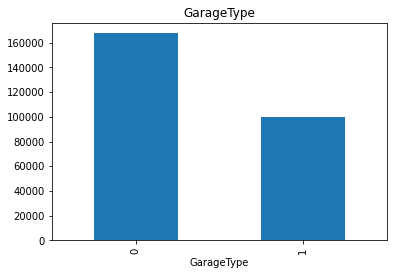

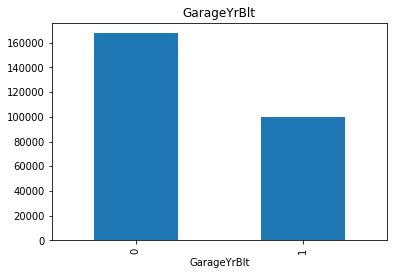

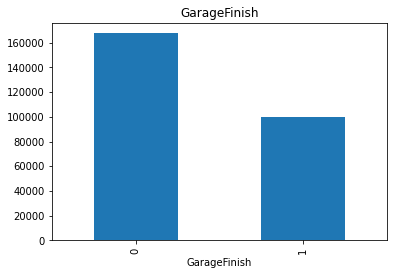

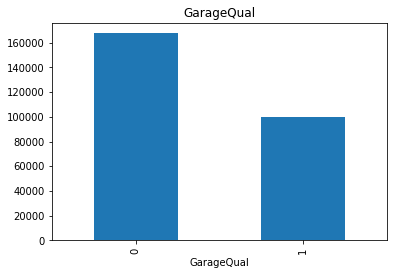

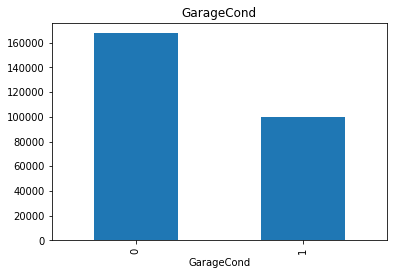

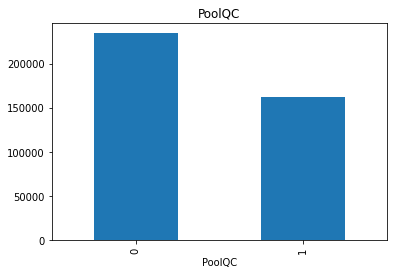

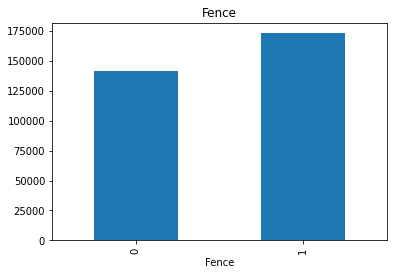

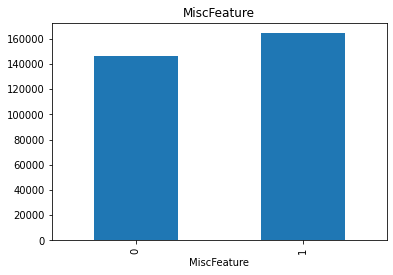

In [5]:

for feature in features_nan:
    data = train.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [6]:
#digging out numerical features
features_num=[feature for feature in train.columns if train[feature].dtype!='O']
features_num_test=[feature for feature in test.columns if test[feature].dtype!='O']
print(len(features_num),len(features_num_test))
train[features_num]

38 37


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


In [7]:
#digging out temporal features
#features based on time
features_temp=[feature for feature in train.columns if 'Yr' in feature or 'Year' in feature]
print(features_temp)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


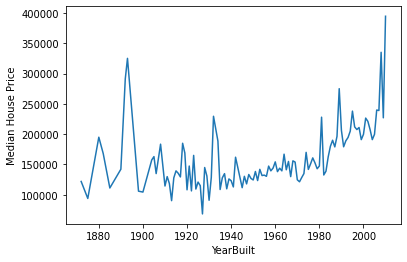

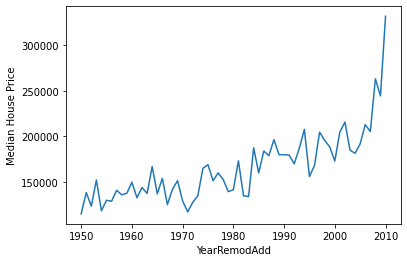

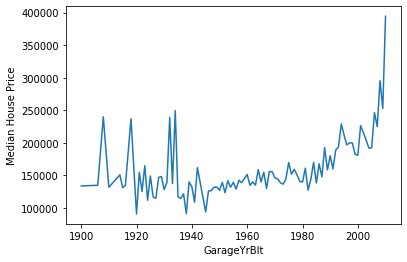

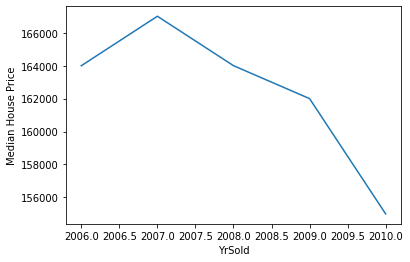

In [8]:
for feature in features_temp:
    train.groupby(feature)['SalePrice'].median().plot()
    plt.xlabel(feature)
    plt.ylabel('Median House Price')
    plt.show()

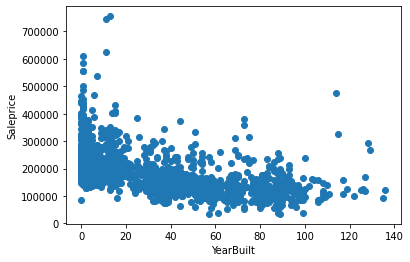

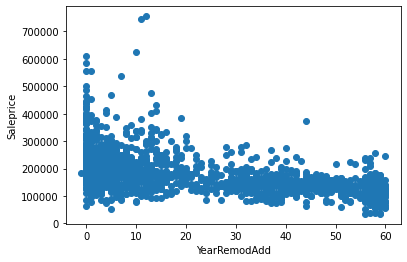

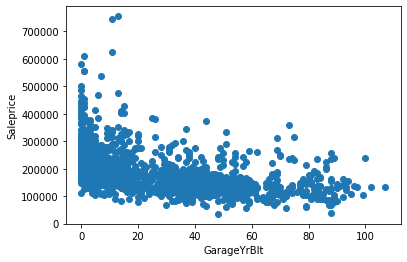

In [9]:
#we are comparing diffrenece between all year features and saleprice
for feature in features_temp:
    if feature !='YrSold':
        data=train.copy()
        data[feature]=data['YrSold']-data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Saleprice')
        plt.show()
    

In [10]:
#numerical feature is of two types, discrete and continuous

#digging discrete features

dis_features=[feature for feature in features_num if len(train[feature].unique())<25 and feature not in features_temp+['Id']]
dis_features_test=[feature for feature in features_num_test if len(test[feature].unique())<25 and feature not in features_temp+['Id']]
print(len(dis_features),len(dis_features_test))

17 16


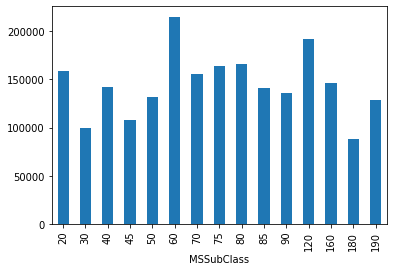

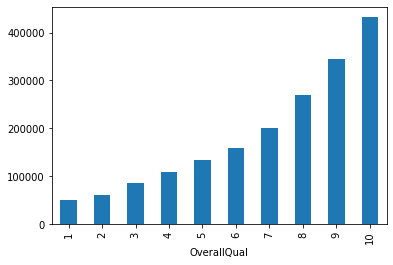

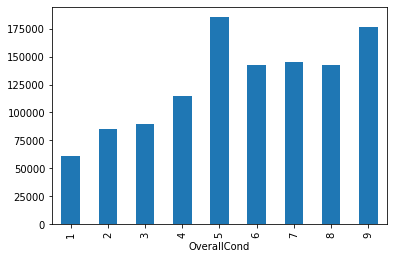

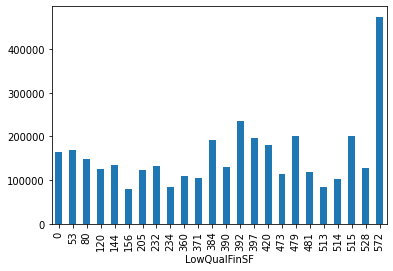

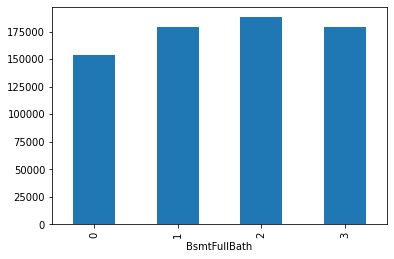

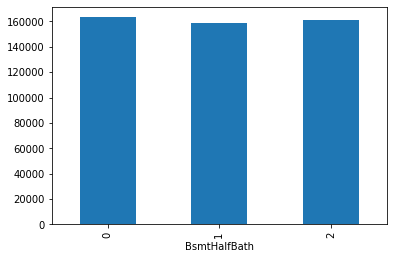

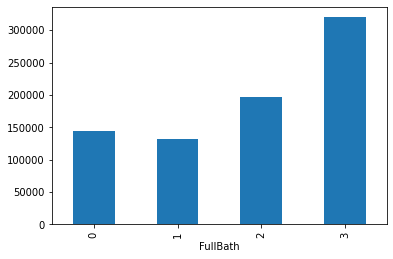

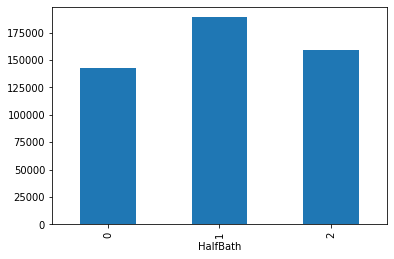

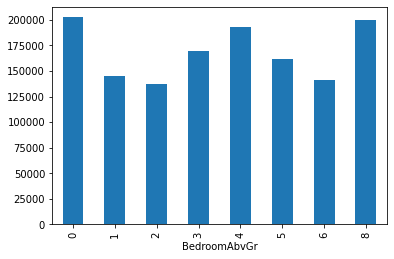

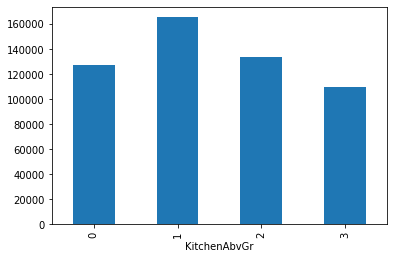

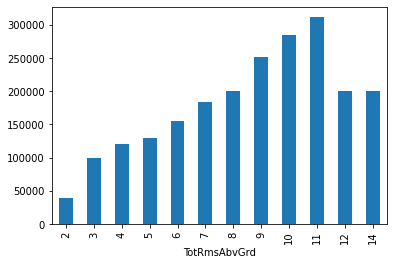

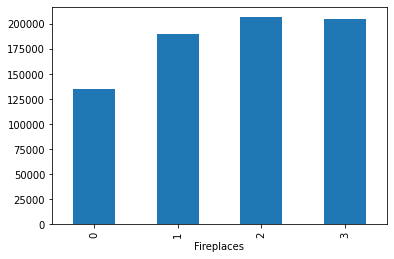

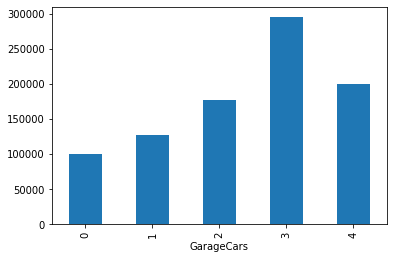

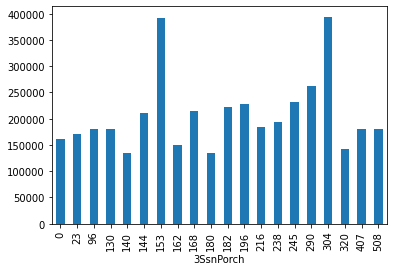

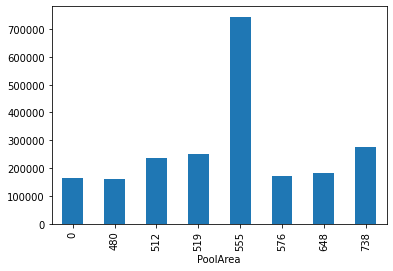

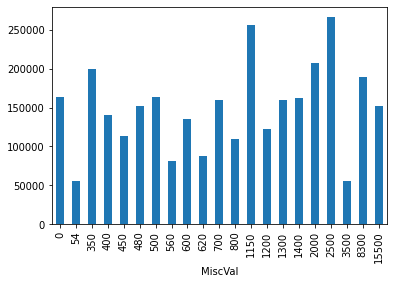

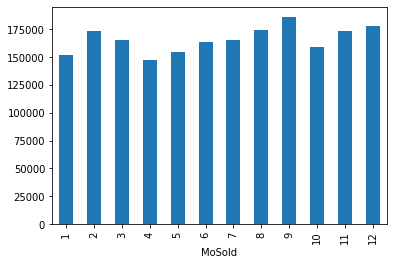

In [11]:
for feature in dis_features:
    data=train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.show()

In [12]:
#digging out continuous numerical features
con_features=[feature for feature in features_num if feature not in dis_features+features_temp+['Id']]
con_features_test=[feature for feature in features_num_test if feature not in dis_features_test+features_temp+['Id']]
con_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

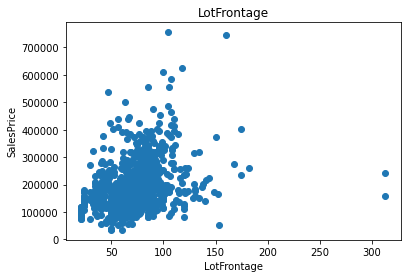

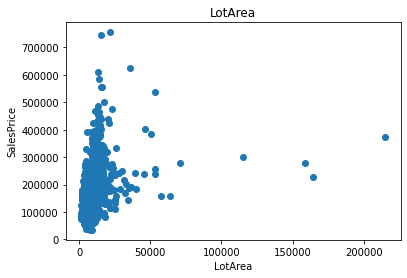

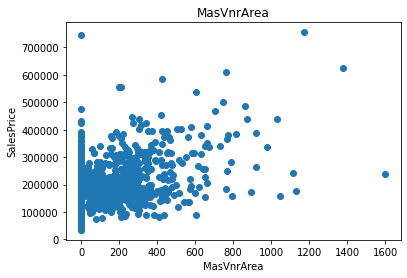

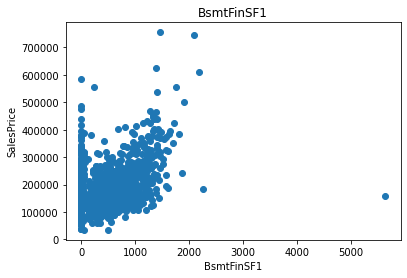

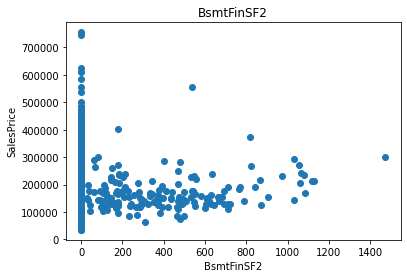

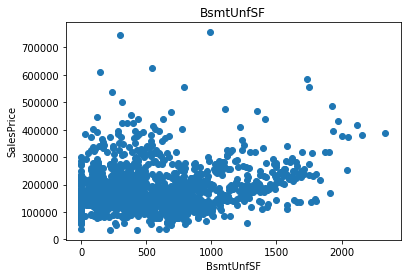

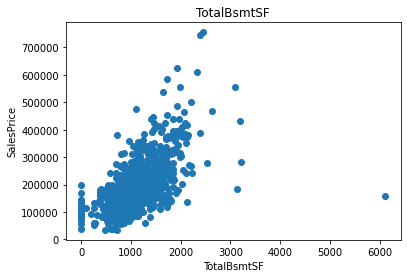

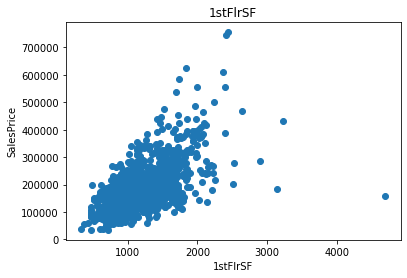

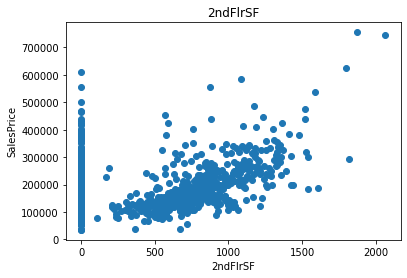

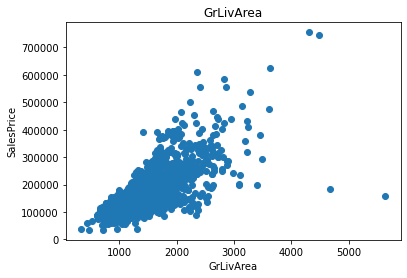

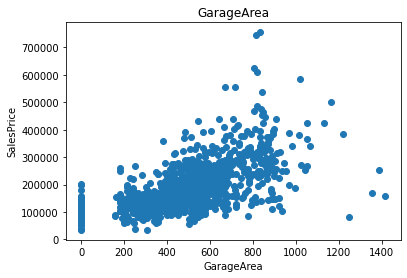

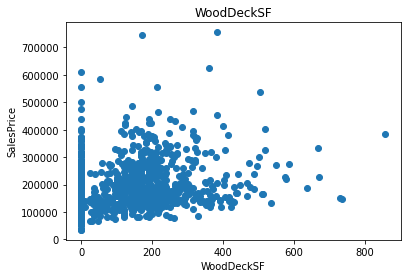

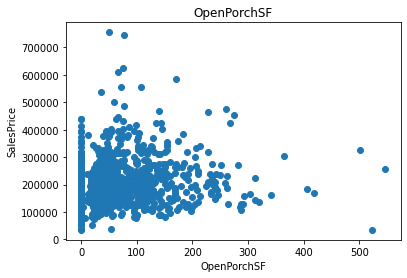

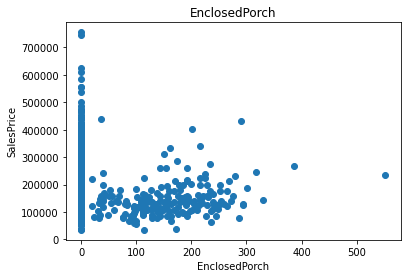

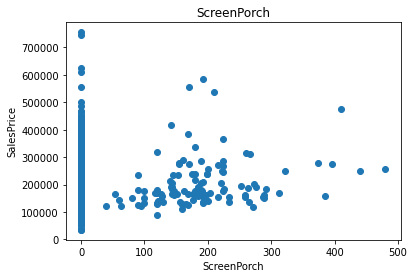

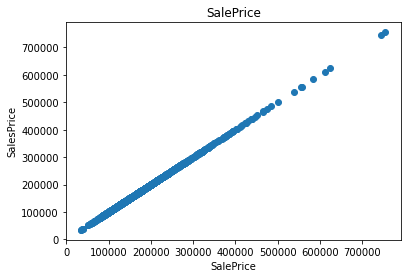

In [13]:
for feature in con_features:
    data=train.copy()
    plt.scatter(data[feature],data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalesPrice')
    plt.title(feature)
    plt.show()

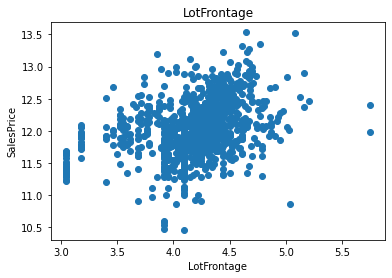

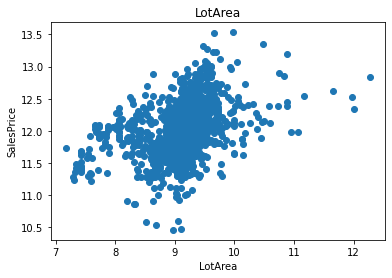

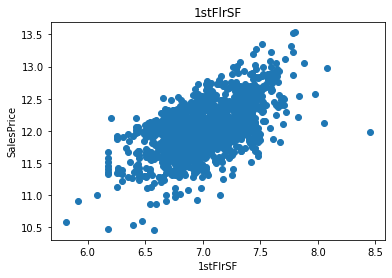

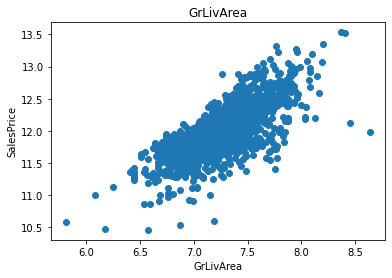

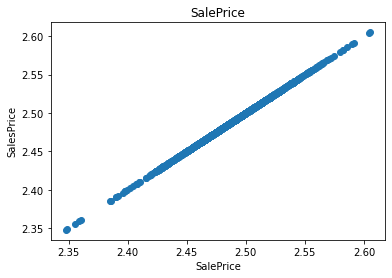

In [14]:
for feature in con_features:
    data=train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

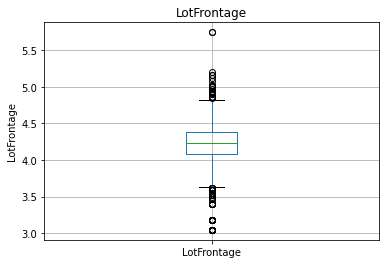

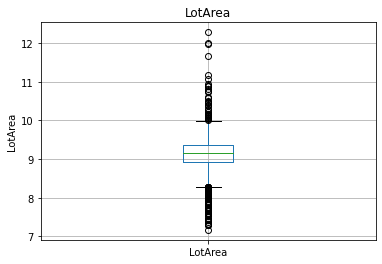

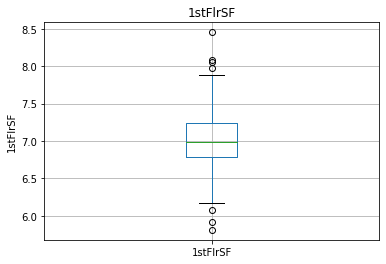

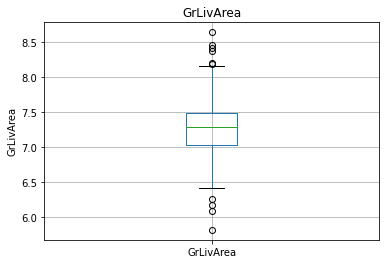

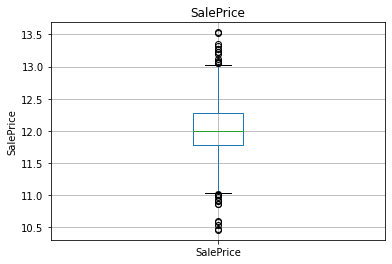

In [15]:
for feature in con_features:
    data=train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()


In [16]:
cat_features=[feature for feature in train.columns if train[feature].dtypes=='O']
cat_features_test=[feature for feature in test.columns if test[feature].dtypes=='O']
len(cat_features)-len(cat_features_test)

0

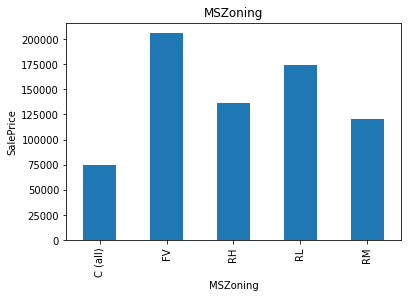

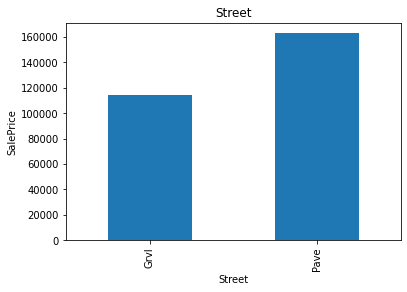

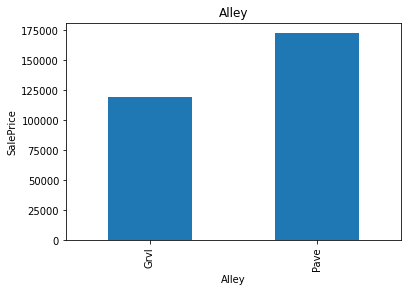

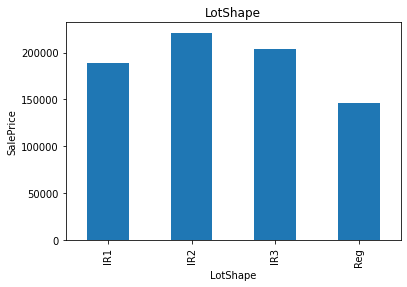

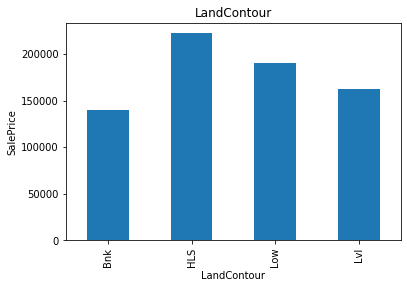

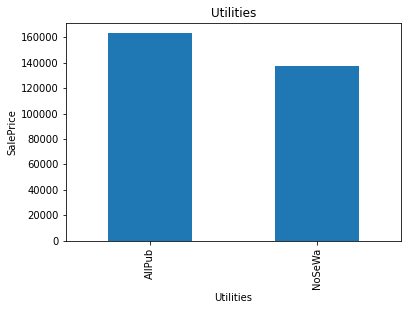

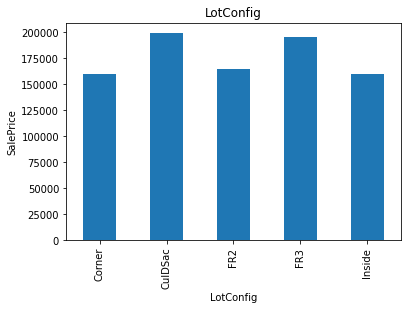

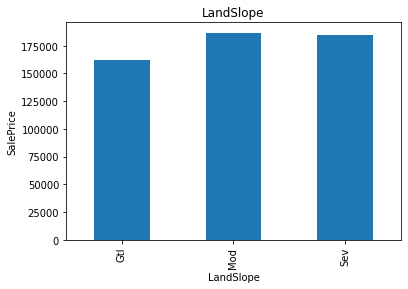

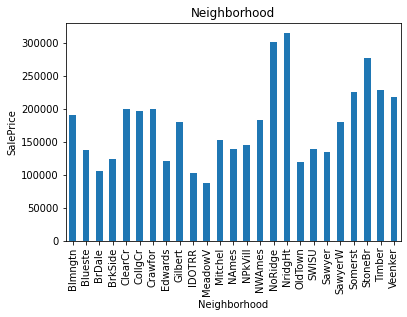

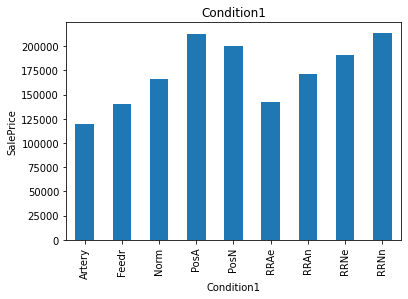

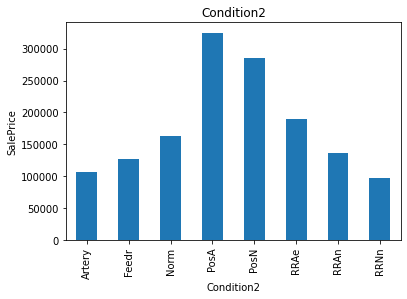

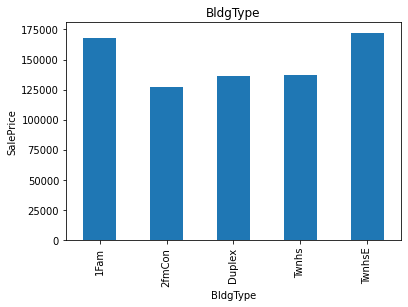

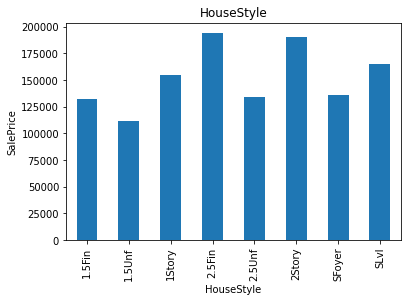

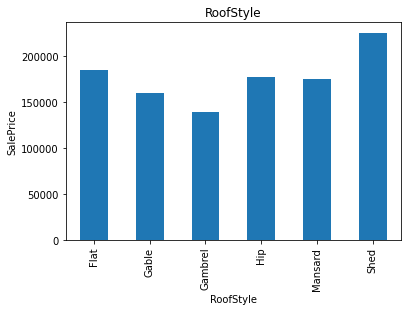

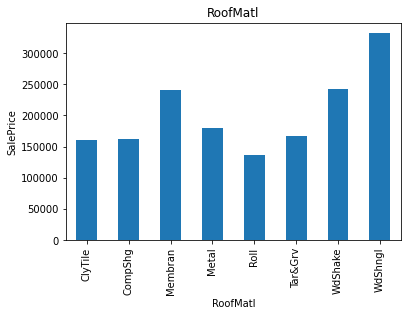

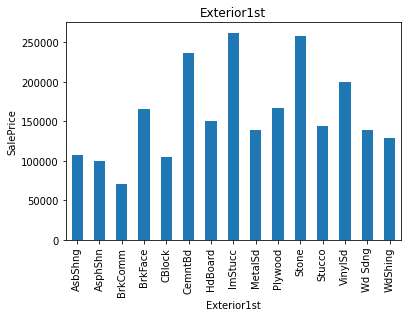

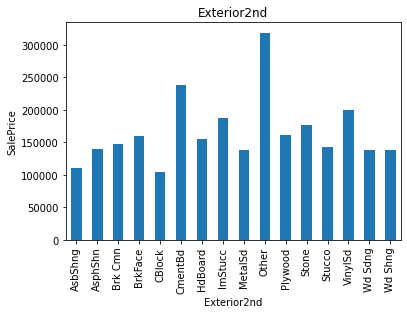

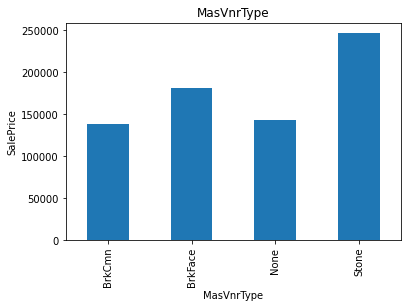

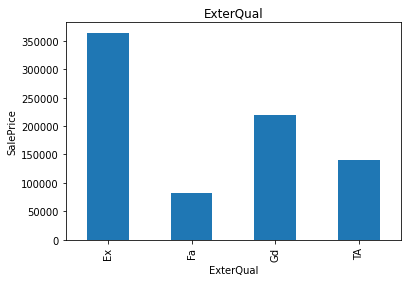

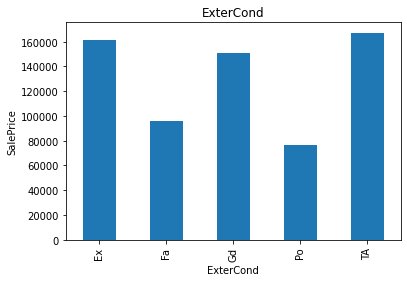

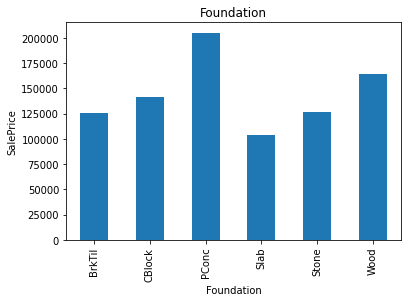

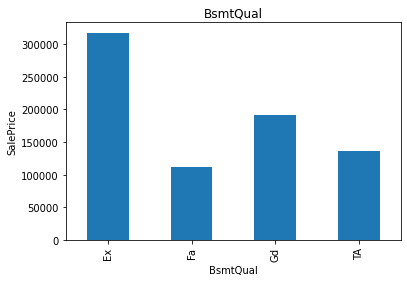

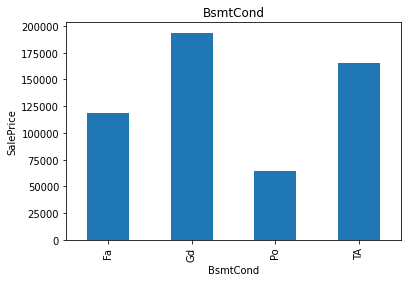

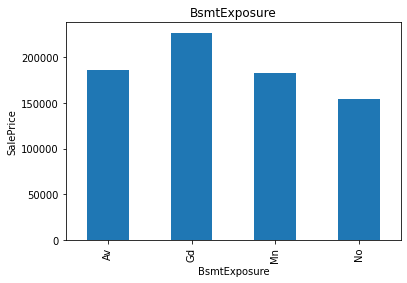

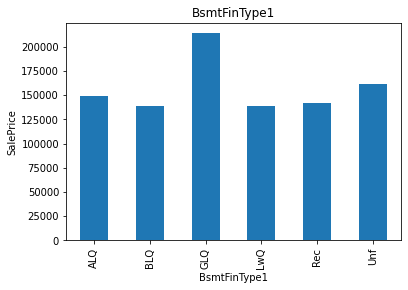

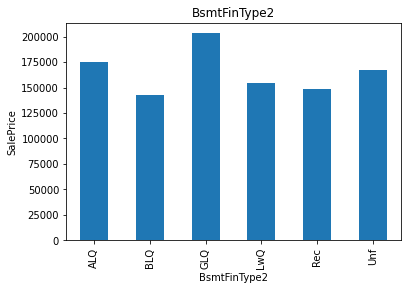

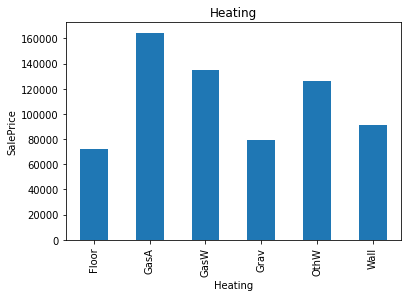

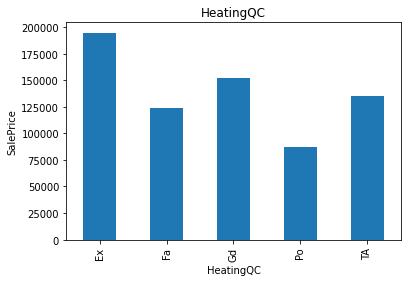

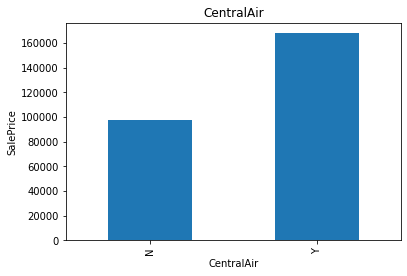

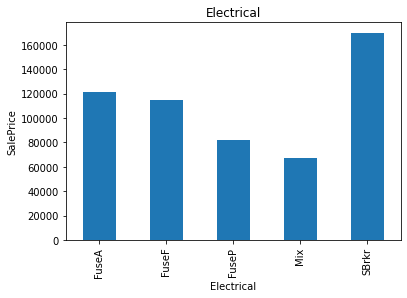

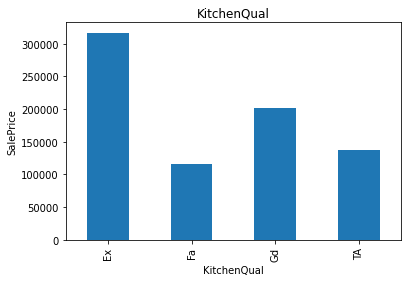

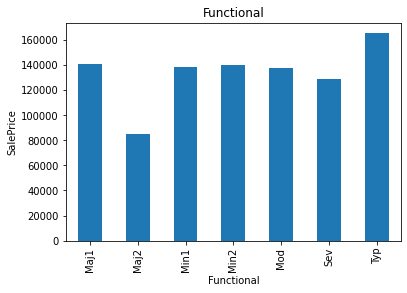

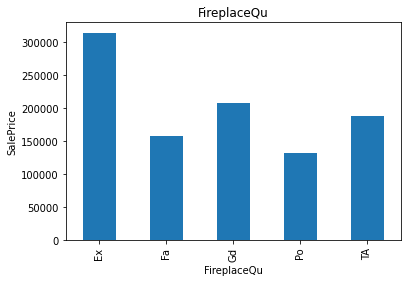

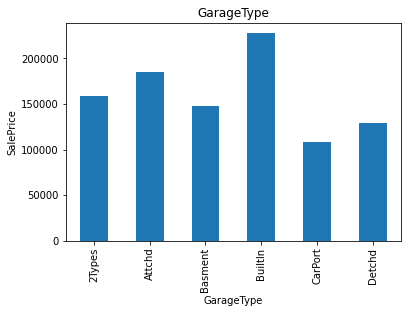

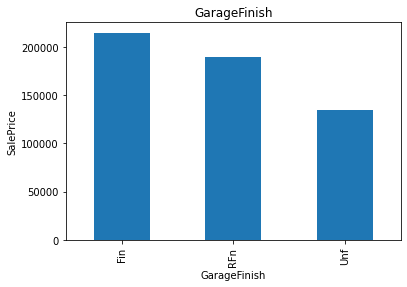

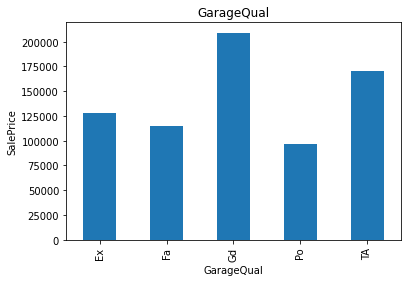

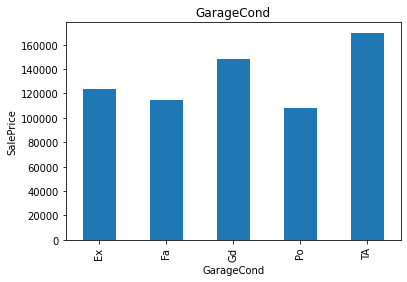

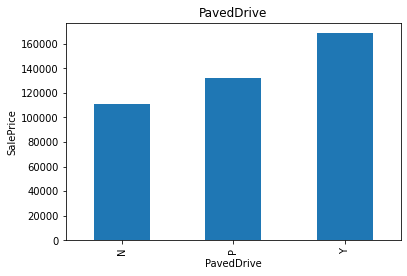

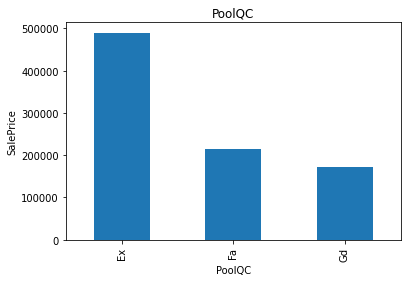

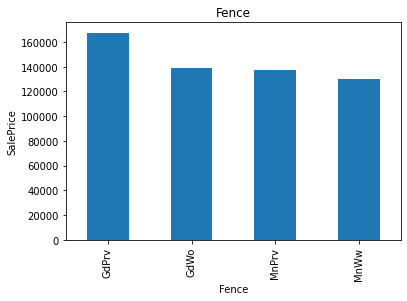

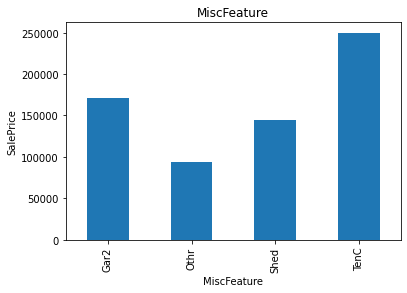

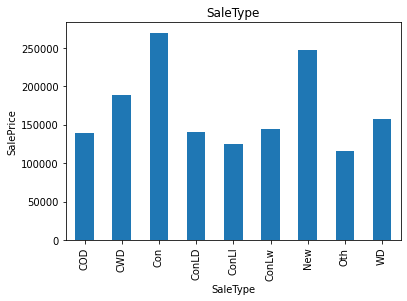

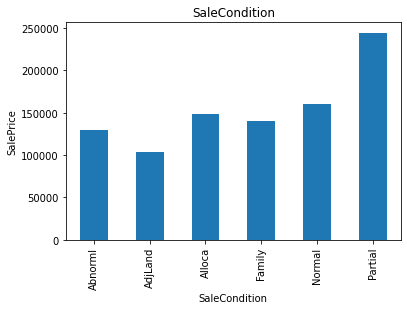

In [17]:
for feature in cat_features:
    data=train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()


## FEATURE ENGINEERING

In [18]:
#missing values of cat_features
features_nan_cat=[feature for feature in train.columns if train[feature].isnull().sum()>0 and train[feature].dtype=='O']

for feature in features_nan_cat:
    print("{}: {}% missing values".format(feature,np.round(train[feature].isnull().mean(),4)))

Alley: 0.9377% missing values
MasVnrType: 0.0055% missing values
BsmtQual: 0.0253% missing values
BsmtCond: 0.0253% missing values
BsmtExposure: 0.026% missing values
BsmtFinType1: 0.0253% missing values
BsmtFinType2: 0.026% missing values
Electrical: 0.0007% missing values
FireplaceQu: 0.4726% missing values
GarageType: 0.0555% missing values
GarageFinish: 0.0555% missing values
GarageQual: 0.0555% missing values
GarageCond: 0.0555% missing values
PoolQC: 0.9952% missing values
Fence: 0.8075% missing values
MiscFeature: 0.963% missing values


In [19]:
def replace_cat_feature(train,features_nan):
    data=train.copy()
    data[features_nan]=data[features_nan].fillna("Missing")
    return data
train=replace_cat_feature(train,features_nan_cat)
test=replace_cat_feature(test,features_nan_cat)
test[features_nan_cat]

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,Missing,None,TA,TA,No,Rec,LwQ,SBrkr,Missing,Attchd,Unf,TA,TA,Missing,MnPrv,Missing
1,Missing,BrkFace,TA,TA,No,ALQ,Unf,SBrkr,Missing,Attchd,Unf,TA,TA,Missing,Missing,Gar2
2,Missing,None,Gd,TA,No,GLQ,Unf,SBrkr,TA,Attchd,Fin,TA,TA,Missing,MnPrv,Missing
3,Missing,BrkFace,TA,TA,No,GLQ,Unf,SBrkr,Gd,Attchd,Fin,TA,TA,Missing,Missing,Missing
4,Missing,None,Gd,TA,No,ALQ,Unf,SBrkr,Missing,Attchd,RFn,TA,TA,Missing,Missing,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,Missing,None,TA,TA,No,Unf,Unf,SBrkr,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
1455,Missing,None,TA,TA,No,Rec,Unf,SBrkr,Missing,CarPort,Unf,TA,TA,Missing,Missing,Missing
1456,Missing,None,TA,TA,No,ALQ,Unf,SBrkr,TA,Detchd,Unf,TA,TA,Missing,Missing,Missing
1457,Missing,None,Gd,TA,Av,GLQ,Unf,SBrkr,Missing,Missing,Missing,Missing,Missing,Missing,MnPrv,Shed


In [20]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in train.columns if train[feature].isnull().sum()>0 and train[feature].dtype!='O']
numerical_with_nan_test=[feature for feature in test.columns if test[feature].isnull().sum()>0 and test[feature].dtype!='O']
## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(train[feature].isnull().mean(),4)))

LotFrontage: 0.1774% missing value
MasVnrArea: 0.0055% missing value
GarageYrBlt: 0.0555% missing value


In [21]:
#filling nan with median of that column as there are ouliers in continues features
for feature in numerical_with_nan:
    med=train[feature].median()
    #train[feature+'nan']=np.where(train[feature].isnull(),1,0)
    train[feature]=train[feature].fillna(med)
for feature in numerical_with_nan_test:
    med=test[feature].median()
    #test[feature+'nan']=np.where(test[feature].isnull(),1,0)
    test[feature]=test[feature].fillna(med)
train[numerical_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [22]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


In [23]:
## Temporal Variables (Date Time Variables)

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    train[feature]=train['YrSold']-train[feature]
    test[feature]=test['YrSold']-test[feature]
train[features_temp]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,2008
1,31,31,31.0,2007
2,7,6,7.0,2008
3,91,36,8.0,2006
4,8,8,8.0,2008
...,...,...,...,...
1455,8,7,8.0,2007
1456,32,22,32.0,2010
1457,69,4,69.0,2010
1458,60,14,60.0,2010


In [24]:
con_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [25]:
#normalizaing continuous features
for feature in con_features:
    train[feature]=np.log(train[feature]+1)
for feature in con_features_test:
    test[feature]=np.log(test[feature]+1)
train[con_features]
    

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,4.189655,9.042040,5.283204,6.561031,0.000000,5.017280,6.753438,6.753438,6.751101,7.444833,6.308098,0.000000,4.127134,0.000000,0.0,12.247699
1,4.394449,9.169623,0.000000,6.886532,0.000000,5.652489,7.141245,7.141245,0.000000,7.141245,6.133398,5.700444,0.000000,0.000000,0.0,12.109016
2,4.234107,9.328212,5.093750,6.188264,0.000000,6.075346,6.825460,6.825460,6.765039,7.488294,6.411818,0.000000,3.761200,0.000000,0.0,12.317171
3,4.110874,9.164401,0.000000,5.379897,0.000000,6.293419,6.629363,6.869014,6.629363,7.448916,6.466145,0.000000,3.583519,5.609472,0.0,11.849405
4,4.442651,9.565284,5.860786,6.486161,0.000000,6.196444,7.044033,7.044033,6.960348,7.695758,6.729824,5.262690,4.442651,0.000000,0.0,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.143135,8.976894,0.000000,0.000000,0.000000,6.860664,6.860664,6.860664,6.543912,7.407318,6.133398,0.000000,3.713572,0.000000,0.0,12.072547
1456,4.454347,9.486152,4.787492,6.673298,5.099866,6.380123,7.341484,7.637234,0.000000,7.637234,6.216606,5.857933,0.000000,0.000000,0.0,12.254868
1457,4.204693,9.109746,0.000000,5.620401,0.000000,6.777647,7.050123,7.080868,7.050123,7.758333,5.533389,0.000000,4.110874,0.000000,0.0,12.493133
1458,4.234107,9.181735,0.000000,3.912023,6.937314,0.000000,6.983790,6.983790,0.000000,6.983790,5.484797,5.905362,0.000000,4.727388,0.0,11.864469


In [26]:
#print("Find most important features relative to target")
#corr = train[con_features].corr()
#corr.sort_values(["SalePrice"], ascending = False, inplace = True)
#corr.SalePrice
#this you can see at the time of heatmap also.

In [27]:
def handle_non_numerical_data(train,cat_features):
    for column in cat_features:
        target_values={}
        def convert_to_int(val):
            return target_values[val]
  
        x=2
        unique_values=train[column].unique()
        for unique in unique_values:
            if unique not in target_values.keys():
                target_values[unique]=x
                x+=1
        train[column]=list(map(convert_to_int,train[column]))
    return train
train=handle_non_numerical_data(train,cat_features)
test=handle_non_numerical_data(test,cat_features_test)
test[cat_features]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1,3,2,2,3,2,2,3,2,2,3,2,2,2,3,2,3,3,3,2,2,2,2,2,2,3,3,2,2,2,2,3,2,2,2,2,2,2,2,2,3,3,2,2
2,3,2,2,3,2,2,2,2,3,3,2,2,3,2,2,2,2,2,2,2,3,3,2,2,4,3,2,3,2,2,2,2,3,2,3,2,2,2,2,2,2,2,2
3,3,2,2,3,2,2,2,2,3,3,2,2,3,2,2,2,2,3,2,2,3,2,2,2,4,3,2,4,2,2,3,2,4,2,3,2,2,2,2,3,2,2,2
4,3,2,2,3,3,2,2,2,4,3,2,3,2,2,2,4,4,2,3,2,3,3,2,2,3,3,2,4,2,2,3,2,2,2,4,2,2,2,2,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,2,2,2,2,2,2,2,25,3,2,4,3,2,2,7,8,2,2,2,2,2,2,2,5,3,2,3,2,2,2,2,2,5,5,3,3,2,2,3,2,2,2
1455,4,2,2,2,2,2,2,2,25,3,2,3,3,2,2,7,8,2,2,2,2,2,2,2,2,3,2,2,2,2,2,2,2,8,2,2,2,2,2,3,2,2,4
1456,3,2,2,2,2,2,2,2,23,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,2,4,2,2,2,2,3,3,2,2,2,2,2,3,2,2,4
1457,3,2,2,2,2,2,2,2,23,3,2,2,6,2,2,4,10,2,2,2,3,3,2,5,4,3,2,2,2,2,2,2,2,5,5,3,3,2,2,2,4,2,2


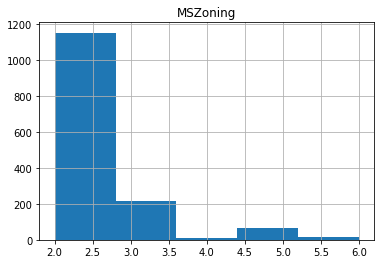

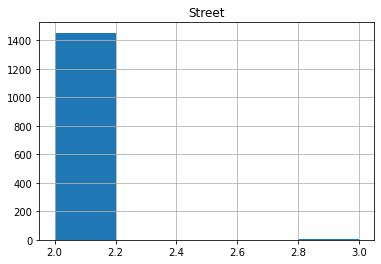

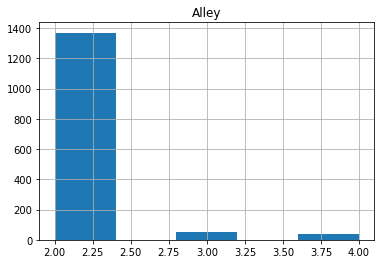

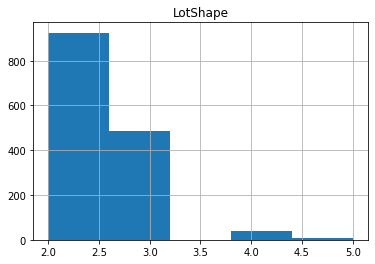

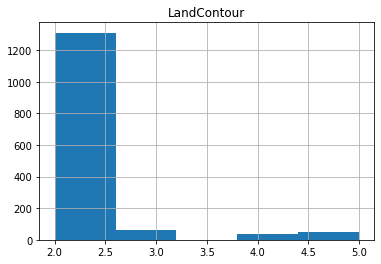

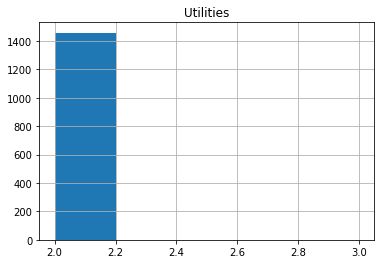

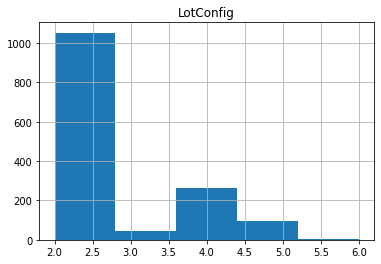

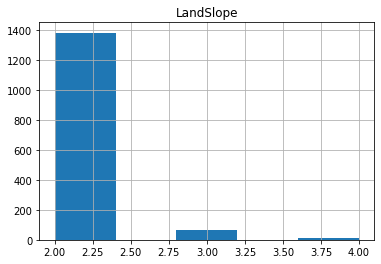

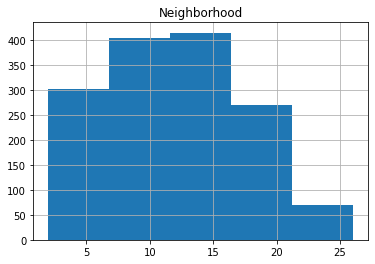

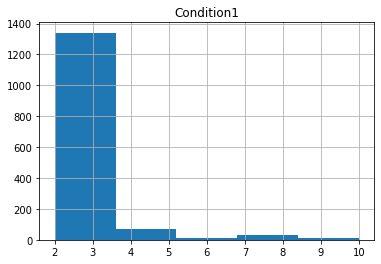

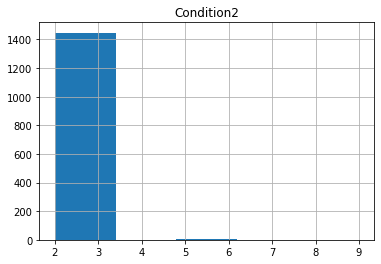

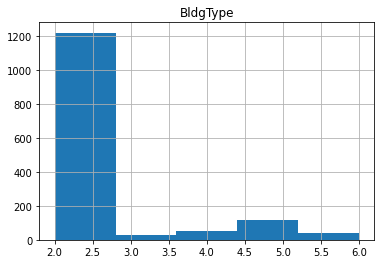

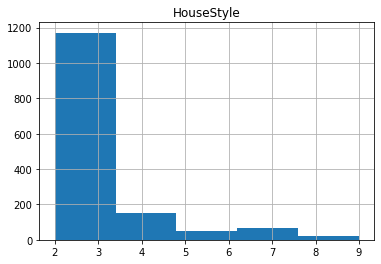

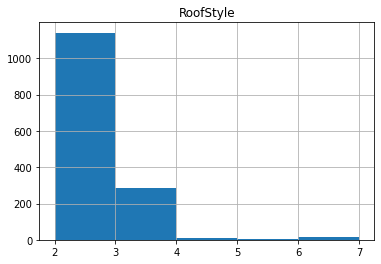

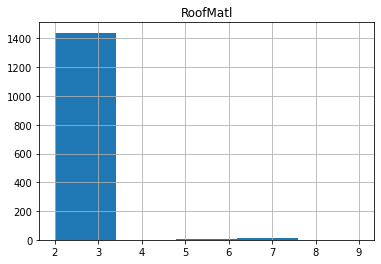

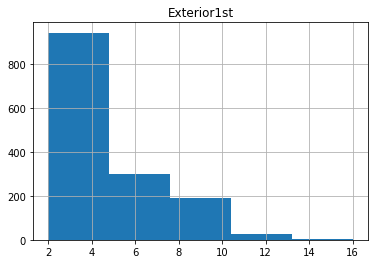

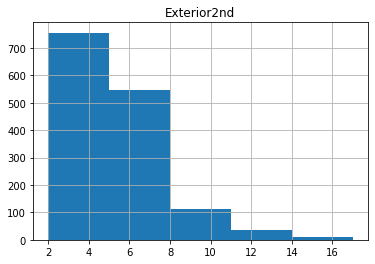

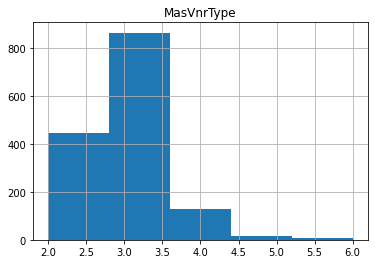

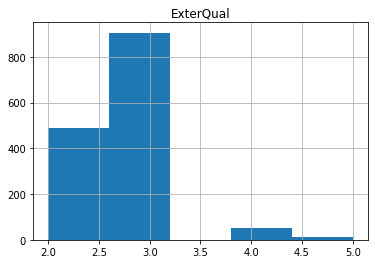

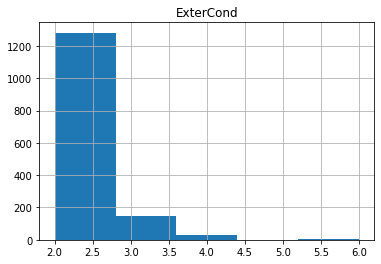

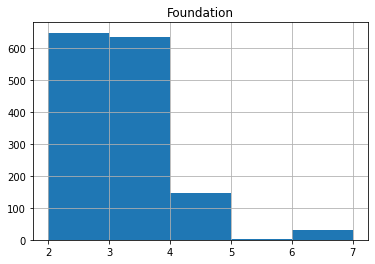

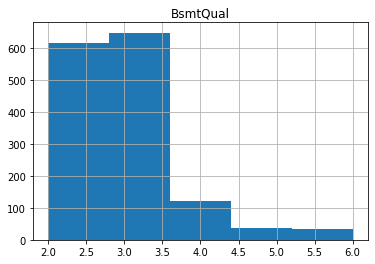

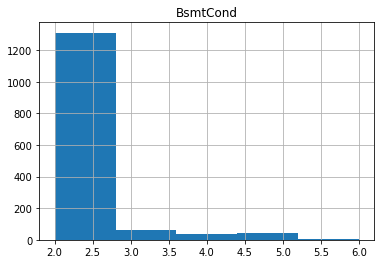

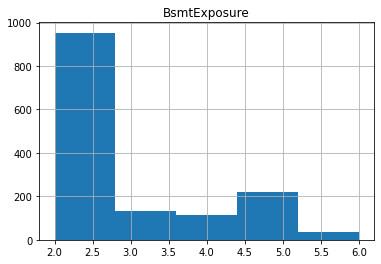

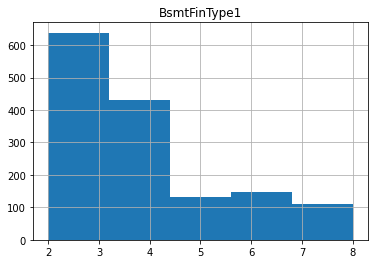

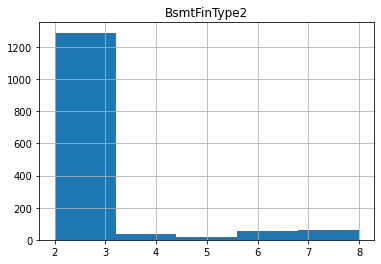

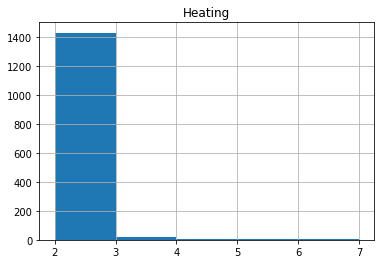

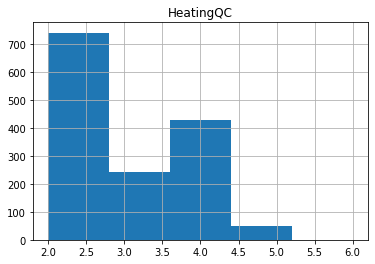

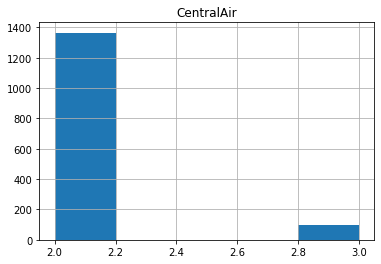

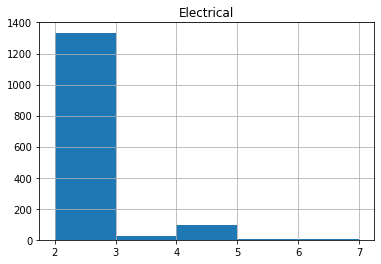

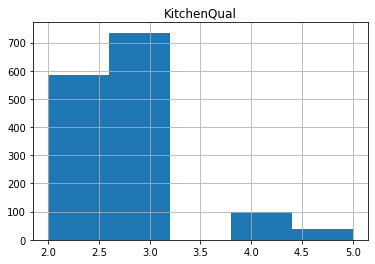

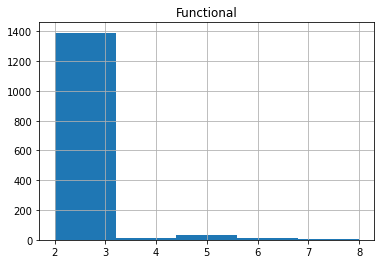

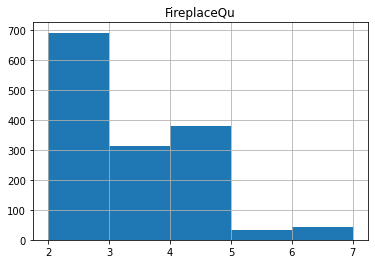

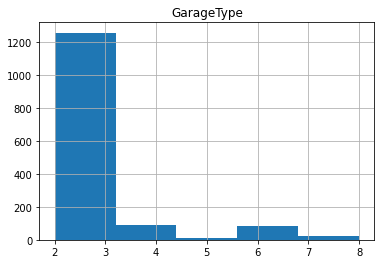

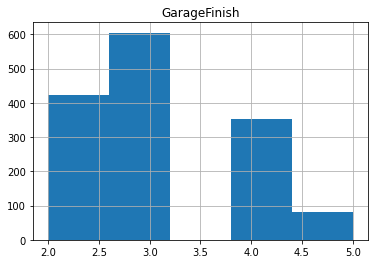

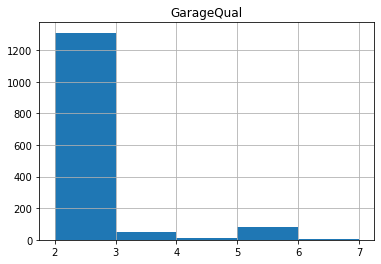

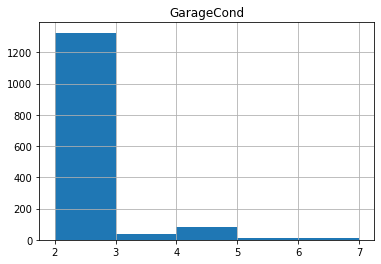

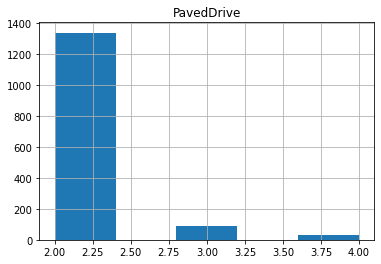

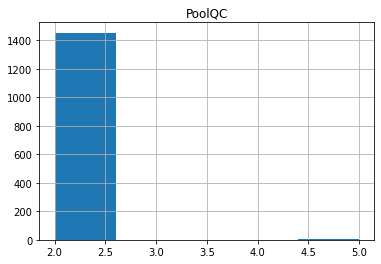

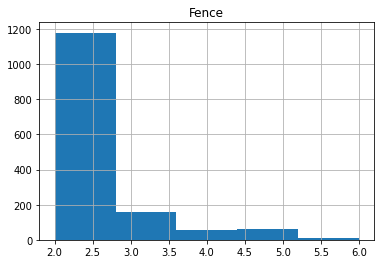

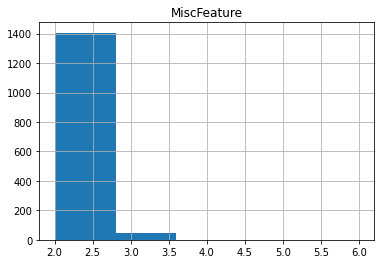

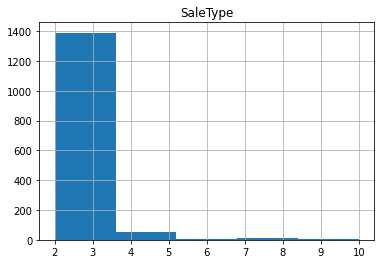

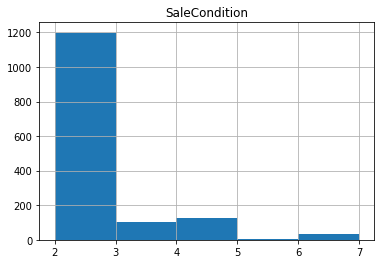

In [28]:
for feature in cat_features:
    data=train.copy()
    data[feature].hist(bins=5)
    plt.title(feature)
    plt.show()

In [29]:
# since the features or not normally distributed we will use log normal distribution
for feature in cat_features:
    train[feature]=np.log(train[feature])
    test[feature]=np.log(test[feature])
test[cat_features]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
1,1.098612,0.693147,0.693147,1.098612,0.693147,0.693147,1.098612,0.693147,0.693147,1.098612,0.693147,0.693147,0.693147,1.098612,0.693147,1.098612,1.098612,1.098612,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,1.098612,1.098612,0.693147,0.693147,0.693147,0.693147,1.098612,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,1.098612,1.098612,0.693147,0.693147
2,1.098612,0.693147,0.693147,1.098612,0.693147,0.693147,0.693147,0.693147,1.098612,1.098612,0.693147,0.693147,1.098612,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,1.098612,1.098612,0.693147,0.693147,1.386294,1.098612,0.693147,1.098612,0.693147,0.693147,0.693147,0.693147,1.098612,0.693147,1.098612,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
3,1.098612,0.693147,0.693147,1.098612,0.693147,0.693147,0.693147,0.693147,1.098612,1.098612,0.693147,0.693147,1.098612,0.693147,0.693147,0.693147,0.693147,1.098612,0.693147,0.693147,1.098612,0.693147,0.693147,0.693147,1.386294,1.098612,0.693147,1.386294,0.693147,0.693147,1.098612,0.693147,1.386294,0.693147,1.098612,0.693147,0.693147,0.693147,0.693147,1.098612,0.693147,0.693147,0.693147
4,1.098612,0.693147,0.693147,1.098612,1.098612,0.693147,0.693147,0.693147,1.386294,1.098612,0.693147,1.098612,0.693147,0.693147,0.693147,1.386294,1.386294,0.693147,1.098612,0.693147,1.098612,1.098612,0.693147,0.693147,1.098612,1.098612,0.693147,1.386294,0.693147,0.693147,1.098612,0.693147,0.693147,0.693147,1.386294,0.693147,0.693147,0.693147,0.693147,1.098612,0.693147,0.693147,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1.386294,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,3.218876,1.098612,0.693147,1.386294,1.098612,0.693147,0.693147,1.945910,2.079442,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,1.609438,1.098612,0.693147,1.098612,0.693147,0.693147,0.693147,0.693147,0.693147,1.609438,1.609438,1.098612,1.098612,0.693147,0.693147,1.098612,0.693147,0.693147,0.693147
1455,1.386294,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,3.218876,1.098612,0.693147,1.098612,1.098612,0.693147,0.693147,1.945910,2.079442,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,1.098612,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,2.079442,0.693147,0.693147,0.693147,0.693147,0.693147,1.098612,0.693147,0.693147,1.386294
1456,1.098612,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,3.135494,1.098612,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,1.098612,1.098612,0.693147,1.386294,0.693147,0.693147,0.693147,0.693147,1.098612,1.098612,0.693147,0.693147,0.693147,0.693147,0.693147,1.098612,0.693147,0.693147,1.386294
1457,1.098612,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,3.135494,1.098612,0.693147,0.693147,1.791759,0.693147,0.693147,1.386294,2.302585,0.693147,0.693147,0.693147,1.098612,1.098612,0.693147,1.609438,1.386294,1.098612,0.693147,0.69

In [30]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0.693147,4.189655,9.042040,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,7,5,5,5,0.693147,0.693147,0.693147,0.693147,0.693147,5.283204,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,6.561031,0.693147,0.0,5.017280,6.753438,0.693147,0.693147,0.693147,0.693147,6.753438,6.751101,0,7.444833,1,0,2,1,3,1,0.693147,8,0.693147,0,0.693147,0.693147,5.0,0.693147,2,6.308098,0.693147,0.693147,0.693147,0.000000,4.127134,0.000000,0,0.0,0,0.693147,0.693147,0.693147,0,2,2008,0.693147,0.693147,12.247699
1,2,20,0.693147,4.394449,9.169623,0.693147,0.693147,0.693147,0.693147,0.693147,1.098612,0.693147,1.098612,1.098612,0.693147,0.693147,1.098612,6,8,31,31,0.693147,0.693147,1.098612,1.098612,1.098612,0.000000,1.098612,0.693147,1.098612,0.693147,0.693147,1.098612,1.098612,6.886532,0.693147,0.0,5.652489,7.141245,0.693147,0.693147,0.693147,0.693147,7.141245,0.000000,0,7.141245,0,1,2,0,3,1,1.098612,6,0.693147,1,1.098612,0.693147,31.0,0.693147,2,6.133398,0.693147,0.693147,0.693147,5.700444,0.000000,0.000000,0,0.0,0,0.693147,0.693147,0.693147,0,5,2007,0.693147,0.693147,12.109016
2,3,60,0.693147,4.234107,9.328212,0.693147,0.693147,1.098612,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,7,5,7,6,0.693147,0.693147,0.693147,0.693147,0.693147,5.093750,0.693147,0.693147,0.693147,0.693147,0.693147,1.386294,0.693147,6.188264,0.693147,0.0,6.075346,6.825460,0.693147,0.693147,0.693147,0.693147,6.825460,6.765039,0,7.488294,1,0,2,1,3,1,0.693147,6,0.693147,1,1.098612,0.693147,7.0,0.693147,2,6.411818,0.693147,0.693147,0.693147,0.000000,3.761200,0.000000,0,0.0,0,0.693147,0.693147,0.693147,0,9,2008,0.693147,0.693147,12.317171
3,4,70,0.693147,4.110874,9.164401,0.693147,0.693147,1.098612,0.693147,0.693147,1.386294,0.693147,1.386294,0.693147,0.693147,0.693147,0.693147,7,5,91,36,0.693147,0.693147,1.386294,1.386294,1.098612,0.000000,1.098612,0.693147,1.386294,1.098612,1.098612,0.693147,1.098612,5.379897,0.693147,0.0,6.293419,6.629363,0.693147,1.098612,0.693147,0.693147,6.869014,6.629363,0,7.448916,1,0,1,0,3,1,0.693147,7,0.693147,1,1.386294,1.098612,8.0,1.098612,3,6.466145,0.693147,0.693147,0.693147,0.000000,3.583519,5.609472,0,0.0,0,0.693147,0.693147,0.693147,0,2,2006,0.693147,1.098612,11.849405
4,5,60,0.693147,4.442651,9.565284,0.693147,0.693147,1.098612,0.693147,0.693147,1.098612,0.693147,1.609438,0.693147,0.693147,0.693147,0.693147,8,5,8,8,0.693147,0.693147,0.693147,0.693147,0.693147,5.860786,0.693147,0.693147,0.693147,0.693147,0.693147,1.609438,0.693147,6.486161,0.693147,0.0,6.196444,7.044033,0.693147,0.693147,0.693147,0.693147,7.044033,6.960348,0,7.695758,1,0,2,1,4,1,0.693147,9,0.693147,1,1.098612,0.693147,8.0,0.693147,3,6.729824,0.693147,0.693147,0.693147,5.262690,4.442651,0.000000,0,0.0,0,0.693147,0.693147,0.693147,0,12,2008,0.693147,0.693147,12.429220


In [31]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,0.693147,4.394449,9.360741,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,5,6,49,49,0.693147,0.693147,0.693147,0.693147,0.693147,0.000000,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,6.150603,0.693147,4.976734,5.602119,6.783325,0.693147,0.693147,0.693147,0.693147,6.799056,0.000000,0,6.799056,0.0,0.0,1,0,2,1,0.693147,5,0.693147,0,0.693147,0.693147,49.0,0.693147,1.0,6.594413,0.693147,0.693147,0.693147,4.948760,0.000000,0.0,0,4.795791,0,0.693147,0.693147,0.693147,0.000000,6,2010,0.693147,0.693147
1,1462,20,1.098612,4.406719,9.565775,0.693147,0.693147,1.098612,0.693147,0.693147,1.098612,0.693147,0.693147,1.098612,0.693147,0.693147,0.693147,6,6,52,52,1.098612,0.693147,1.098612,1.098612,1.098612,4.691348,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,1.098612,6.828712,1.098612,0.000000,6.008813,7.192934,0.693147,0.693147,0.693147,0.693147,7.192934,0.000000,0,7.192934,0.0,0.0,1,1,3,1,1.098612,6,0.693147,0,0.693147,0.693147,52.0,0.693147,1.0,5.746203,0.693147,0.693147,0.693147,5.976351,3.610918,0.0,0,0.000000,0,0.693147,1.098612,1.098612,9.433564,6,2010,0.693147,0.693147
2,1463,60,1.098612,4.317488,9.534668,0.693147,0.693147,1.098612,0.693147,0.693147,0.693147,0.693147,1.098612,1.098612,0.693147,0.693147,1.098612,5,5,13,12,0.693147,0.693147,0.693147,0.693147,0.693147,0.000000,0.693147,0.693147,1.098612,1.098612,0.693147,0.693147,1.386294,6.674561,1.098612,0.000000,4.927254,6.834109,0.693147,1.098612,0.693147,0.693147,6.834109,6.553933,0,7.396335,0.0,0.0,2,1,3,1,0.693147,6,0.693147,1,1.098612,0.693147,13.0,1.098612,2.0,6.180017,0.693147,0.693147,0.693147,5.361292,3.555348,0.0,0,0.000000,0,0.693147,0.693147,0.693147,0.000000,3,2010,0.693147,0.693147
3,1464,60,1.098612,4.369448,9.208238,0.693147,0.693147,1.098612,0.693147,0.693147,0.693147,0.693147,1.098612,1.098612,0.693147,0.693147,1.098612,6,6,12,12,0.693147,0.693147,0.693147,0.693147,1.098612,3.044522,0.693147,0.693147,1.098612,0.693147,0.693147,0.693147,1.386294,6.401917,1.098612,0.000000,5.783825,6.831954,0.693147,1.386294,0.693147,0.693147,6.831954,6.520621,0,7.380879,0.0,0.0,2,1,3,1,1.098612,7,0.693147,1,1.386294,0.693147,12.0,1.098612,2.0,6.154858,0.693147,0.693147,0.693147,5.888878,3.610918,0.0,0,0.000000,0,0.693147,1.098612,0.693147,0.000000,6,2010,0.693147,0.693147
4,1465,120,1.098612,3.784190,8.518392,0.693147,0.693147,1.098612,1.098612,0.693147,0.693147,0.693147,1.386294,1.098612,0.693147,1.098612,0.693147,8,5,18,18,0.693147,0.693147,1.386294,1.386294,0.693147,0.000000,1.098612,0.693147,1.098612,1.098612,0.693147,0.693147,1.098612,5.575949,1.098612,0.000000,6.925595,7.155396,0.693147,1.386294,0.693147,0.693147,7.155396,0.000000,0,7.155396,0.0,0.0,2,0,2,1,1.098612,5,0.693147,0,0.693147,0.693147,18.0,1.386294,2.0,6.228511,0.693147,0.693147,0.693147,0.000000,4.418841,0.0,0,4.976734,0,0.693147,1.098612,0.693147,0.000000,1,2010,0.693147,0.693147


## Feature Scaling

In [32]:
from sklearn import preprocessing

In [33]:
colnames=[features for features in train.columns if features not in ['SalePrice','Id']]
len(colnames)

79

In [34]:

y_train=train['SalePrice']
X_train=train.drop(['SalePrice','Id'],axis=1)
X_test=test.drop(['Id'],axis=1)
X_train=preprocessing.scale(X_train)
X_test=preprocessing.scale(X_test)


In [35]:
X_train=pd.DataFrame(X_train)
X_train.columns=colnames
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.073375,-0.46514,-0.078896,-0.133270,-0.064238,-0.248513,-0.730297,-0.316864,-0.02618,-0.604883,-0.230851,-2.288970,-0.353529,-0.096933,-0.427739,-1.118659,0.651479,-0.517200,-1.043259,-0.869941,-0.486901,-0.126288,-1.082870,-1.138942,-1.351747,1.203619,-1.330528,-0.355282,-0.992327,-1.011751,-0.316122,-0.681035,-1.302133,0.779431,-0.379269,-0.355342,-0.340511,0.002513,-0.137687,-0.926424,-0.263813,-0.299412,-0.803645,1.180528,-0.120242,0.529194,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-1.109787,0.912210,-0.253477,-0.951226,-0.948684,-0.697101,-1.008328,-1.351415,0.311725,0.343693,-0.318026,-0.303994,-0.288734,-0.946701,0.845209,-0.404244,-0.116339,-0.292769,-0.068692,-0.066476,-0.448070,-0.186632,-0.087688,-1.599111,0.138777,-0.343668,-0.430429
1,-0.872563,-0.46514,0.572719,0.113413,-0.064238,-0.248513,-0.730297,-0.316864,-0.02618,0.621914,-0.230851,-1.695528,0.957447,-0.096933,-0.427739,0.056953,-0.071836,2.179628,-0.183465,0.390141,-0.486901,-0.126288,-0.335883,-0.431973,0.381884,-0.806841,0.561834,-0.355282,0.495245,-1.011751,-0.316122,0.386656,-0.362840,0.888257,-0.379269,-0.355342,0.002218,0.341114,-0.137687,-0.926424,-0.263813,-0.299412,0.418479,-0.870117,-0.120242,-0.381965,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,0.520143,-0.318683,-0.253477,0.600495,0.241234,-0.697101,0.073805,-1.351415,0.311725,0.223593,-0.318026,-0.303994,-0.288734,1.249540,-1.072916,-0.404244,-0.116339,-0.292769,-0.068692,-0.066476,-0.448070,-0.186632,-0.087688,-0.489110,-0.614439,-0.343668,-0.430429
2,0.073375,-0.46514,0.062541,0.420049,-0.064238,-0.248513,1.118593,-0.316864,-0.02618,-0.604883,-0.230851,-2.288970,-0.353529,-0.096933,-0.427739,-1.118659,0.651479,-0.517200,-0.977121,-0.821476,-0.486901,-0.126288,-1.082870,-1.138942,-1.351747,1.131524,-1.330528,-0.355282,-0.992327,-1.011751,-0.316122,1.144194,-1.302133,0.654803,-0.379269,-0.355342,0.230372,0.065397,-0.137687,-0.926424,-0.263813,-0.299412,-0.576677,1.184762,-0.120242,0.659631,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-1.109787,-0.318683,-0.253477,0.600495,0.241234,-0.697101,-0.925087,-1.351415,0.311725,0.414997,-0.318026,-0.303994,-0.288734,-0.946701,0.675137,-0.404244,-0.116339,-0.292769,-0.068692,-0.066476,-0.448070,-0.186632,-0.087688,0.990891,0.138777,-0.343668,-0.430429
3,0.309859,-0.46514,-0.329561,0.103317,-0.064238,-0.248513,1.118593,-0.316864,-0.02618,1.492340,-0.230851,-1.274475,-0.353529,-0.096933,-0.427739,-1.118659,0.651479,-0.517200,1.800676,0.632464,-0.486901,-0.126288,0.194112,0.069630,0.381884,-0.806841,0.561834,-0.355282,1.550694,0.416422,1.644829,-0.681035,-0.362840,0.384539,-0.379269,-0.355342,0.348034,-0.105819,-0.137687,0.318915,-0.263813,-0.299412,-0.439421,1.143550,-0.120242,0.541448,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,-1.109787,0.296763,-0.253477,0.600495,1.085495,0.491235,-0.883467,0.068265,1.650307,0.452344,-0.318026,-0.303994,-0.288734,-0.946701,0.592558,2.844374,-0.116339,-0.292769,-0.068692,-0.066476,-0.448070,-0.186632,-0.087688,-1.599111,-1.367655,-0.343668,1.072853
4,0.073375,-0.46514,0.726089,0.878431,-0.064238,-0.248513,1.118593,-0.316864,-0.02618,0.6219

In [36]:
X_test=pd.DataFrame(X_test)
X_test.columns=colnames
features_na=[feature for feature in X_test.columns if X_test[feature].isnull().sum()>0]
features_na

[]

## Feature Selection

In [37]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [38]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [39]:
feature_sel_model.get_support()

array([False, False, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True, False,  True,  True, False,  True, False, False,
        True,  True, False,  True,  True, False,  True,  True, False,
        True,  True,  True, False, False, False,  True, False, False,
       False,  True,  True, False, False, False,  True, False,  True,
        True, False, False, False, False,  True, False])

In [40]:

# this is how we can make a list of the selected features
selected_feat = X_train.columns[feature_sel_model.get_support()]
# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))


total features: 79
selected features: 43


In [41]:
X_train[selected_feat]
X_test[selected_feat]

,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageCars,PavedDrive,WoodDeckSF,ScreenPorch,PoolQC,Fence,SaleType
0,0.561787,-0.06426,-0.726026,-0.317801,-0.03705,-0.534545,-0.210103,-1.862634,-1.702339,-0.094034,-0.751101,0.400766,0.413784,1.178391,-0.467323,-0.103479,-0.375157,-1.058656,-0.979628,-0.348232,-0.679652,-2.091924,0.648657,0.056019,-1.444204,-0.272716,-0.612887,-1.442112,-0.818068,-1.028720,-0.751040,-0.20391,-0.888640,-0.252669,-0.898055,-0.898793,-0.988189,-0.336944,0.968486,2.844271,-0.043814,-2.141044,-0.366662
1,0.970407,-0.06426,1.174381,-0.317801,-0.03705,0.949952,-0.210103,-1.862634,-0.172340,-0.094034,-0.054877,0.400766,0.512398,1.320405,1.665173,-0.103479,-0.375157,-1.058656,-0.979628,-0.348232,-0.679652,-0.925133,0.876989,0.395932,-1.444204,-0.272716,0.588954,-0.194908,-0.818068,-1.028720,1.237648,-0.20391,0.697783,-0.252669,-0.898055,-0.898793,-0.988189,-0.336944,1.365515,-0.324992,-0.043814,0.084440,-0.366662
2,0.908413,-0.06426,1.174381,-0.317801,-0.03705,-0.534545,-0.210103,-1.376109,-0.172340,-0.094034,-0.751101,-0.497418,-0.769577,-0.573119,-0.467323,-0.103479,-0.375157,0.443435,0.363433,-0.348232,-0.679652,-0.097282,0.825084,0.098161,-0.144448,-0.272716,-0.505930,0.449155,-0.818068,0.773083,1.237648,-0.20391,-0.888640,-0.252669,0.647066,0.261877,0.301406,-0.336944,1.127876,-0.324992,-0.043814,-2.141044,-0.366662
3,0.257857,-0.06426,1.174381,-0.317801,-0.03705,-0.534545,-0.210103,-1.376109,-0.172340,-0.094034,-0.054877,0.400766,-0.802448,-0.573119,-0.467323,-0.103479,-0.375157,0.443435,-0.979628,-0.348232,-0.679652,-0.097282,0.733280,0.096373,0.777744,-0.272716,-0.512506,0.400213,-0.818068,0.773083,1.237648,-0.20391,0.697783,-0.252669,0.647066,1.085385,0.301406,-0.336944,1.331718,-0.324992,-0.043814,0.084440,-0.366662
4,-1.116969,-0.06426,1.174381,1.823377,-0.03705,-0.534545,-0.210103,-1.030914,-0.172340,-0.094034,1.337571,-0.497418,-0.605221,-0.289090,-0.467323,-0.103479,-0.375157,0.443435,0.363433,-0.348232,-0.679652,-0.925133,0.455161,0.364781,0.777744,-0.272716,0.474414,-0.313771,-0.818068,0.773083,-0.751040,-0.20391,0.697783,-0.252669,-0.898055,-0.898793,0.301406,-0.336944,-0.943556,2.963846,-0.043814,0.084440,-0.366662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-3.009264,-0.06426,-0.726026,-0.317801,-0.03705,-0.534545,-0.210103,1.168035,-0.172340,-0.094034,-1.447325,1.298950,-0.013540,0.562996,-0.467323,-0.103479,-0.375157,-1.058656,-0.979628,-0.348232,-0.679652,0.544849,-1.422364,-0.341376,-0.144448,-0.272716,-2.122081,-0.816336,-0.818068,-1.028720,1.237648,-0.20391,-0.888640,-0.252669,-0.898055,-0.898793,-2.277784,-0.336944,-0.943556,-0.324992,-0.043814,0.084440,-0.366662
1455,-3.052953,-0.06426,-0.726026,-0.317801,-0.03705,-0.534545,-0.210103,1.168035,-0.172340,-0.094034,-1.447325,-0.497418,-0.013540,0.562996,-0.467323,-0.103479,-0.375157,-1.058656,-0.979628,-0.348232,-0.679652,-2.091924,0.440830,-0.341376,-1.444204,-0.272716,-2.122081,-0.816336,-0.818068,-1.028720,1.237648,-0.20391,-0.888640,-0.252669,-0.898055,-0.898793,-0.988189,-0.336944,-0.943556,-0.324992,-0.043814,0.084440,-0.366662
1456,1.643551,-0.06426,-0.726026,-0.317801,-0.03705,-0.534545,-0.210103,1.067984,-0.172340,-0.094034,-0.751101,1.298950,0.315171,-0.667795,-0.467323,-0.103479,-0.375157,-1.058656,-0.979628,-0.348232,-0.679652,-0.925133,0.971939,0.327687,0.777744,-0.272716,0.338021,-0.455313,1.067495,-1.028720,-0.751040,-0.20391,-0.888640,-0.252669,0.647066,0.261877,0.301406,-0.336944,1.437751,-0.324992,-0.043814,0.084440,-0.366662
1457,0.348243,-0.064

In [42]:
X_train.to_csv('X_train.csv')
y_train.to_csv('y_train.csv')
X_test.to_csv('X_test.csv')

In [43]:
h=xyz.corr()['SalePrice']
h.to_dict()

NameError: name 'xyz' is not defined